# Problem Statement and Data Description

#### Customer Churn Prediction: 

A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank. 
Your task as a data scientist would be to predict the propensity to churn for each customer. 

#### Data Dictionary 

There are multiple variables in the dataset which can be cleanly divided into 3 categories: 

##### I. Demographic information about customers 

customer_id - Customer id  
vintage - Vintage of the customer with the bank in a number of days  
age - Age of customer  
gender - Gender of customer  
dependents - Number of dependents  
occupation - Occupation of the customer  
city - City of the customer (anonymized)  

##### II. Customer Bank Relationship 

customer_nw_category - Net worth of customer (3: Low 2: Medium 1: High)  
branch_code - Branch Code for a customer account  
days_since_last_transaction - No of Days Since Last Credit in Last 1 year  

##### III. Transactional Information 

current_balance - Balance as of today  
previous_month_end_balance - End of Month Balance of previous month  
average_monthly_balance_prevQ - Average monthly balances (AMB) in Previous Quarter  
average_monthly_balance_prevQ2 - Average monthly balances (AMB) in previous to the previous quarter  
current_month_credit - Total Credit Amount current month  
previous_month_credit - Total Credit Amount previous month  
current_month_debit - Total Debit Amount current month  
previous_month_debit - Total Debit Amount previous month  
current_month_balance - Average Balance of current month  
previous_month_balance - Average Balance of previous month  
churn - Average balance of customer falls below minimum balance in the next quarter (1/0)  

# Loading the Dataset


In [92]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [93]:
df=pd.read_csv('churn_prediction.csv')

In [94]:
df.shape

(28382, 21)

In [95]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


# Data Exploration

In [96]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


observation-We can identify the number of missing values from the 'count' given.(by comparing it with             shape
            It is showing only continuous variables,for categorical variables I will use next command

In [97]:
df.describe(include='all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


count can be used to find out missing values

###### Isnull function


In [98]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

There are missing values in variables gender,dependents,occupation,city,days_since_last_transaction

###### Data Types

In [99]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

customer_id,city,customer_nw_category,branch_code should be object instead of int/float

#### Summary of Data Exploration:

In [100]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()

In [101]:
temp

,data_type,null_count,unique_count
customer_id,int64,0,28382
vintage,int64,0,5473
age,int64,0,90
gender,object,525,2
dependents,float64,2463,15
occupation,object,80,5
city,float64,803,1604
customer_nw_category,int64,0,3
branch_code,int64,0,3185
days_since_last_transaction,float64,3223,360


# Univariate Analysis

#### Histogram

Text(0.5, 0, 'vintage')

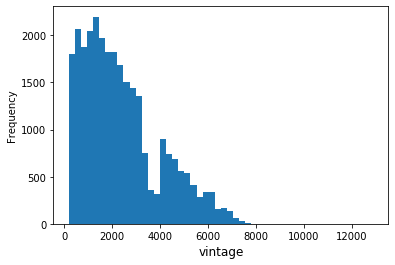

In [102]:
#vintage
df['vintage'].plot.hist(bins = 50)
plt.xlabel('vintage', fontsize=12)

Distribution of vintage is right skewed

Very large number of customer has vintage between 100 and 3000

Text(0.5, 0, 'age')

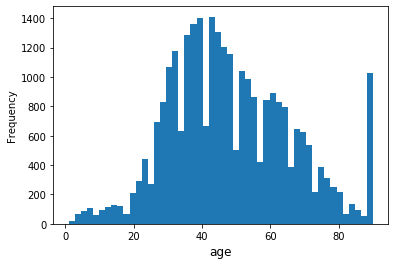

In [103]:
#age
df['age'].plot.hist(bins = 50)
plt.xlabel('age', fontsize=12)

Very few have age between 0-20

graph is almost normal(slightly left skewed)

Most customers have age between 30 and 70

#### Value_counts()

In [104]:
#target variable- churn
df['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

It has obviously 2 values

In [105]:
#customer_nw_category 
df['customer_nw_category'].value_counts()

2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64

It has 3 categories-(3: Low 2: Medium 1: High)

3711 customers have High net worth which is good for bank,while majority falls in the medium category of net worth

#### Bar plots

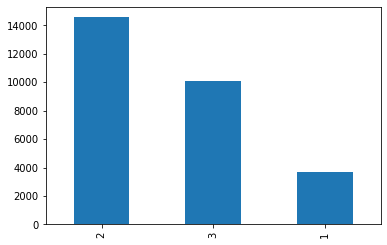

In [106]:
#customer_nw_category
df['customer_nw_category'].value_counts().plot(kind = 'bar')

# Data Manipulation

#### 1. Drop Duplicates(if any)

In [107]:
df.drop_duplicates()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


comparing rows with df.shape - data set has not any duplicates

#### 2. Missing Values

In [108]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

###### 1.gender

In [109]:
df['gender'].mode()

0    Male
dtype: object

In [110]:
#filling missing values for categorical variable with their mode
df['gender'].fillna('Male',inplace=True)

###### 2.Dependents

In [111]:
df['dependents'].mode()

0    0.0
dtype: float64

In [112]:
df['dependents'].fillna(value=0.0,inplace=True)

###### 3.Occupation

In [113]:
df['occupation'].mode()

0    self_employed
dtype: object

In [114]:
df['occupation'].fillna(value='self_employed',inplace=True)

###### 4.City

In [115]:
df['city'].mode()

0    1020.0
dtype: float64

In [116]:
df['city'].fillna(value=1020.0,inplace=True)

###### 5.days_since_last_transaction 

In [117]:
df['days_since_last_transaction'].mean()

69.99781390357327

In [118]:
#replacing continuous variable with mean
df['days_since_last_transaction'].fillna(value=70.0,inplace=True)

In [119]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

So now there are not any missing values

#### 3. Data Types

In [120]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [121]:
df=df.astype({'customer_id':'object','city':'object','customer_nw_category':'object','branch_code':'object','dependents':'object'})

# Bivariate Analysis

In [122]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

#### 1. current_month-debit and churn

In [123]:
df.groupby('churn')['current_month_debit'].mean()

churn
0    2467.586989
1    8894.855785
Name: current_month_debit, dtype: float64

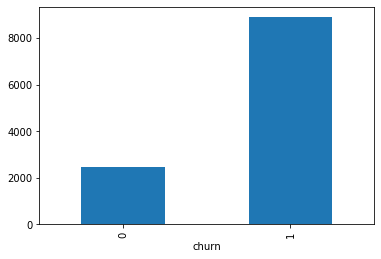

In [124]:
df.groupby('churn')['current_month_debit'].mean().plot.bar()

those who have debited more in current month are more likely to  churn


#### 2.previous_month_debit and churn

In [125]:
df.groupby('churn')['previous_month_debit'].mean()

churn
0    2492.988437
1    7062.020549
Name: previous_month_debit, dtype: float64

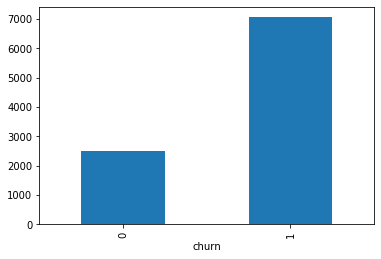

In [126]:
df.groupby('churn')['previous_month_debit'].mean().plot.bar()

those who have debited more in previous month are more likely to churn

#### 3. churn and age

In [127]:
df.groupby('churn')['age'].mean()

churn
0    48.378298
1    47.461217
Name: age, dtype: float64

There is no relation between age and churn prediction

In [128]:
df.drop(['customer_id'], axis=1, inplace = True)
df=pd.get_dummies(df)

# Logistic Regression

#### Train Test split

In [129]:
x = df.drop(['churn'],axis=1)
y = df['churn']

In [130]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y= train_test_split(x, y, test_size = 0.3, random_state=1,stratify=y)

#### Model Building

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, auc
from sklearn.metrics import roc_auc_score

In [132]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
pred_train = logreg.predict_proba(train_x)
pred_valid = logreg.predict_proba(valid_x)

In [134]:
roc_auc_score(train_y, pred_train[:,1])

0.6924687342525997

In [135]:
roc_auc_score(valid_y, pred_valid[:,1])

0.6836642949683125

### Observations:

roc-auc score for train and test data set is almost same ,which is a good sign(model is not overfitting,neither under fitting)

# Random Forest Classifier

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth= 4, random_state=2)

In [137]:
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [138]:
pred_train_rf = rf.predict_proba(train_x)
pred_valid_rf = rf.predict_proba(valid_x)

In [139]:
roc_auc_score(train_y, pred_train_rf[:,1])

0.7951079712658347

In [140]:
roc_auc_score(valid_y, pred_valid_rf[:,1])

0.789401554055301

### observations:

roc-auc score for train data and test data has not much difference,which is a good sign((model is nor overfitting,neither under fitting)

roc-auc score for test data using random forest is better than using logistic regression